<a href="https://colab.research.google.com/github/sunshineluyao/EthosGPT/blob/main/EthosGPT/EthoGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I: Replicate the Inglehart–Welzel Cultural Map Using 2017-2022 Joint Survey Data

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import data from GitHub and process to select the most recent year's data for each country
url = 'https://raw.githubusercontent.com/sunshineluyao/EthosGPT/refs/heads/main/data/F00016619-CulturalMapFinalEVSWVS_2023.csv'
data = pd.read_csv(url)

# Extract relevant columns and clean country names
data['Country'] = data['S025 Country - year'].str.extract(r'(\D+.*)\s\(')[0]

# Select the most recent data for each country
latest_data= data.sort_values('S025 Country - year', ascending=False).groupby('Country').first()
latest_data= latest_data.reset_index()[['Country', 'S025 Country - year', 'TradAgg', 'SurvSAgg']]
latest_data.columns = ['Country', 'Year', 'Traditional_vs_Secular', 'Survival_vs_SelfExpression']

# Strip whitespace from the 'Country' column
latest_data['Country'] = latest_data['Country'].str.strip()

In [125]:
# Step 2: Updated Cultural Region information
cultural_regions = {
    'African-Islamic': [
        'Algeria', 'Egypt', 'Jordan', 'Libya', 'Morocco', 'Tunisia', 'Yemen', 'Iraq',
        'Nigeria', 'Uganda', 'Lebanon', 'Pakistan', 'Bangladesh', 'Turkey', 'Palestine',
        'Ethiopia', 'Kenya', 'Ghana', 'Mali', 'Maldives', 'Trinidad and Tobago', 'Rwanda', 'Tanzania', 'Zimbabwe', 'Burkina Faso'
    ],
    'Confucian': [
        'China', 'Hong Kong SAR', 'Japan', 'South Korea', 'Taiwan ROC', 'Singapore', 'Vietnam', 'Macau SAR', 'Mongolia'
    ],
    'Latin America': [
        'Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Mexico', 'Peru', 'Uruguay', 'Venezuela',
        'Bolivia', 'Guatemala', 'Honduras', 'Nicaragua', 'Paraguay', 'Dominican Republic', 'Haiti',
        'Philippines', 'Puerto Rico', 'El Salvador'
    ],
    'Catholic Europe': [
        'France', 'Italy', 'Spain', 'Portugal', 'Poland', 'Austria', 'Belgium', 'Luxembourg', 'Ireland', 'Malta', 'Andorra', 'Cyprus'
    ],
    'English-Speaking': [
        'United States', 'Canada', 'Australia', 'New Zealand', 'United Kingdom', 'Ireland', 'Great Britain', 'Northern Ireland'
    ],
    'Orthodox Europe': [
        'Russia', 'Ukraine', 'Belarus', 'Serbia', 'Armenia', 'Georgia', 'Moldova', 'Romania',
        'Bosnia and Herzegovina', 'Montenegro', 'Bulgaria', 'North Macedonia', 'Greece', 'Albania', 'Kosovo'
    ],
    'Protestant Europe': [
        'Germany', 'Germany West', 'Denmark', 'Sweden', 'Norway', 'Netherlands', 'Switzerland', 'Finland', 'Iceland',
        'Lithuania', 'Latvia', 'Estonia', 'Czechia', 'Hungary', 'Slovakia', 'Slovenia', 'Croatia'
    ],
    'West & South Asia': [
        'India', 'Indonesia', 'Malaysia', 'Bangladesh', 'Thailand', 'Philippines', 'Sri Lanka', 'Iran', 'Saudi Arabia',
        'Kazakhstan', 'Kyrgyzstan', 'Uzbekistan', 'Turkey', 'Myanmar', 'Zambia', 'South Africa', 'Tajikistan', 'Qatar', 'Israel', 'Azerbaijan'
    ],
}

# Function to assign regions
def assign_region(country):
    for region, countries in cultural_regions.items():
        if country in countries:
            return region
    return 'Other'

# Assign cultural region
latest_data['Cultural_Region'] = latest_data['Country'].apply(assign_region)

# Verify that all countries are now classified
unclassified_countries = latest_data[latest_data['Cultural_Region'] == 'Other']['Country'].tolist()

# Ensure there are no unclassified countries
assert len(unclassified_countries) == 0, f"Unclassified countries: {unclassified_countries}"
latest_data

,Country,Year,Traditional_vs_Secular,Survival_vs_SelfExpression,Cultural_Region
0,Albania,82018 Albania (2018),-0.7451,-0.8307,Orthodox Europe
1,Algeria,122014 Algeria (2014),-0.7798,-0.9247,African-Islamic
2,Andorra,202018 Andorra (2018),0.5486,2.1823,Catholic Europe
3,Argentina,322017 Argentina (2017),-0.4009,0.1913,Latin America
4,Armenia,512021 Armenia (2021),-1.3110,-0.7100,Orthodox Europe
...,...,...,...,...,...
111,Venezuela,8622021 Venezuela (2021),-1.0603,-0.2503,Latin America
112,Vietnam,7042020 Vietnam (2020),-0.4429,0.6128,Confucian
113,Yemen,8872014 Yemen (2014),-1.3641,-1.2543,African-Islamic
114,Zambia,8942007 Zambia (2007),-0.5099,-0.9148,West & South Asia


In [126]:
latest_data.to_csv("indices.csv")

In [89]:
pip install adjustText

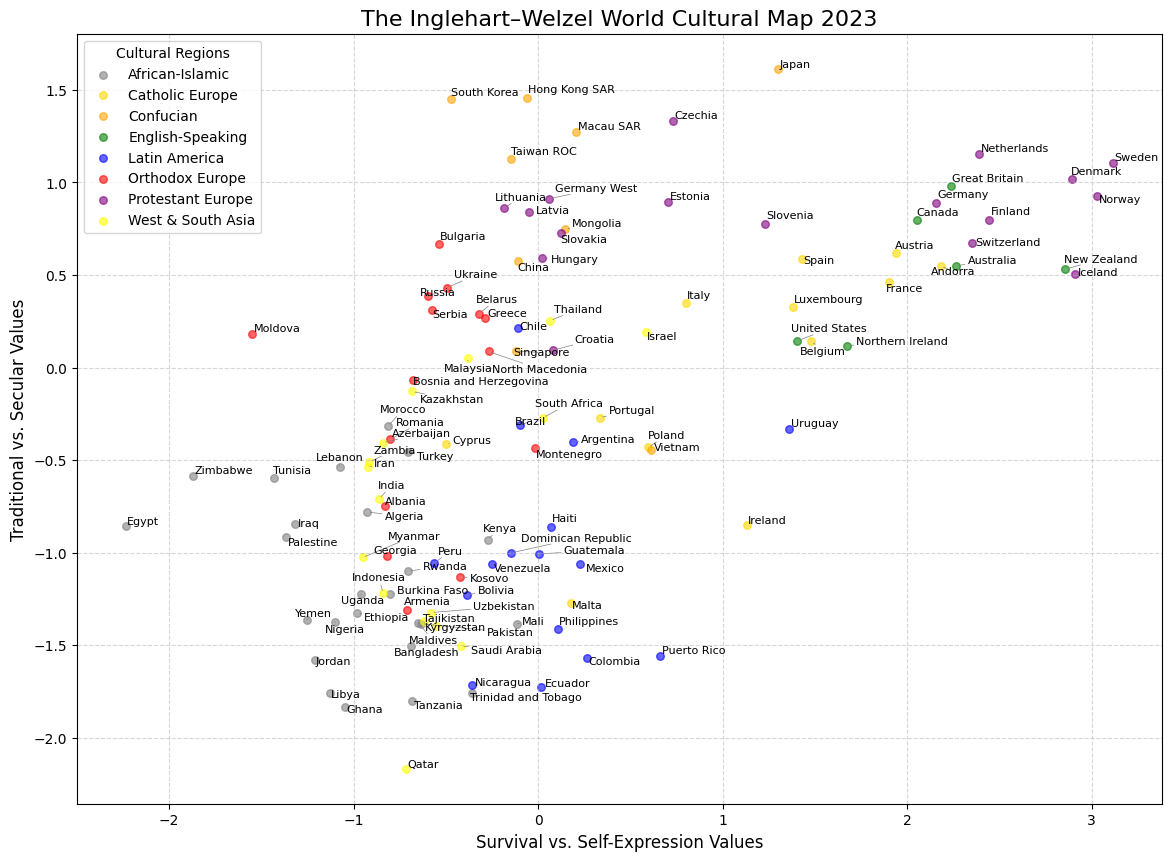

In [127]:
from adjustText import adjust_text  # This library helps to adjust text to avoid overlapping
import matplotlib.pyplot as plt

# Step 3: Plot the Inglehart–Welzel World Cultural Map
plt.figure(figsize=(14, 10))
colors = {
    'African-Islamic': 'gray', 'Confucian': 'orange', 'Latin America': 'blue',
    'Catholic Europe': 'gold', 'English-Speaking': 'green', 'Orthodox Europe': 'red',
    'Protestant Europe': 'purple', 'West & South Asia': 'yellow'
}

texts = []
for region, group in latest_data.groupby('Cultural_Region'):
    plt.scatter(group['Survival_vs_SelfExpression'], group['Traditional_vs_Secular'],
                label=region, alpha=0.6, s=30, c=colors[region])  # Reduced size from 100 to 60

    # Add text labels with an offset
    for i, row in group.iterrows():
        texts.append(
            plt.text(
                row['Survival_vs_SelfExpression'], row['Traditional_vs_Secular'],
                row['Country'], fontsize=8
            )
        )

# Adjust text to avoid overlaps
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Add legend and labels
plt.legend(title='Cultural Regions', loc='best', fontsize=10)
plt.title("The Inglehart–Welzel World Cultural Map 2023", fontsize=16)
plt.xlabel("Survival vs. Self-Expression Values", fontsize=12)
plt.ylabel("Traditional vs. Secular Values", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)


# Display the plot
plt.show()


# Part II: Generate the Culture Map Using ChatGPT Prompt Engineering



### **From Prompt to Cultural Indices**

| **Dimension**                         | **ID**  | **Survey Question**              | **Key Description**                                                                                              | **Question Prompt with Response Formatting Instructions / Feature Description**                                                                                                                    | **Factor Loading** | **Relationship to Key Description** | **Encoding Notes**                         | **Factor Loading with Direction** |
|----------------------------------------|---------|----------------------------------|------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------|--------------------------------------|---------------------------------------------|-----------------------------------|
| **Traditional vs. Secular Values**     | **F063**| Importance of God               | *God is very important in respondent’s life.*                                                                   | *"How important is God in your life? Use a scale from 1 (Not at all important) to 10 (Very important)."*                                                                                          | 0.70               | Positive                              | N/A                                         | 0.70                             |
|                                        | **Y003**| Autonomy Index                  | *It is more important for a child to learn obedience and religious faith than independence and determination.*   | *"Which qualities should children be encouraged to learn? Choose up to five qualities, such as Independence, Hard work, Imagination, Religious faith, Obedience, etc. Your five choices:"*        | 0.61               | Negative                              | Encoded as `+1` for Secular traits (Independence, Imagination), `-1` for Traditional traits (Religious faith, Obedience), and `0` for Neutral traits (Hard work, Respect). | -0.61                            |
|                                        | **F120**| Justifiability of Abortion      | *Abortion is never justifiable.*                                                                                | *"How justifiable do you think abortion is? Use a scale from 1 (Never justifiable) to 10 (Always justifiable)."*                                                                                  | 0.61               | Negative                              | N/A                                         | -0.61                            |
|                                        | **G006**| Pride of Nationality            | *Respondent has strong sense of national pride.*                                                                | *"How proud are you to be your nationality? Use a scale from 1 (Not at all proud) to 4 (Very proud)."*                                                                                            | 0.60               | Positive                              | N/A                                         | 0.60                             |
|                                        | **E018**| Respect for Authority           | *Respondent favors more respect for authority.*                                                                 | *"If greater respect for authority takes place in the near future, would it be a good thing (1), you don’t mind (2), or a bad thing (3)?"*                                                        | 0.51               | Negative                              | N/A                                         | -0.51                            |
| **Survival vs. Self-Expression Values**| **A008**| Feeling of Happiness            | *Respondent describes self as not very happy.*                                                                  | *"Taking all things together, rate how happy you would say you are. Use a scale from 1 (Very happy) to 4 (Not at all happy)."*                                                                     | 0.59               | Positive                              | N/A                                         | 0.59                             |
|                                        | **Y002**| Post-Materialist Index          | *Respondent gives priority to economic and physical security over self-expression and quality of life.*          | *"Among the following goals, which do you consider the most important? Respond with two numbers separated by a comma: 1 (Order), 2 (Say in Government), 3 (Prices), 4 (Freedom of Speech)."*       | 0.59               | Negative                              | Encoded as `+1` for each Self-Expression Value (Democracy, Freedom), `-1` for each Survival Value (Order, Economic Security). Final range: `-2` to `+2`.              | -0.59                            |
|                                        | **F118**| Justifiability of Homosexuality | *Homosexuality is never justifiable.*                                                                           | *"How justifiable do you think homosexuality is? Use a scale from 1 (Never justifiable) to 10 (Always justifiable)."*                                                                             | 0.58               | Negative                              | N/A                                         | -0.58                            |
|                                        | **E025**| Petition Signing Experience     | *Respondent has not and would not sign a petition.*                                                             | *"Please tell me whether you have signed a petition (1), might do it (2), or would never do it (3). Respond only with the options provided."*                                                     | 0.54               | Positive                              | N/A                                         | 0.54                             |
|                                        | **A165**| Trust on People                 | *You have to be very careful about trusting people.*                                                            | *"Generally speaking, would you say that most people can be trusted (1) or that you need to be very careful in dealing with people (2)?"*                                                         | 0.44               | Positive                              | N/A                                         | 0.44                             |


In [10]:
pip install openai==0.27.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.54.4
    Uninstalling openai-1.54.4:
      Successfully uninstalled openai-1.54.4


In [102]:
# Step 1: Create a blank text file
file_path = "/content/api_key.txt"

# Create the file and provide instructions
with open(file_path, "w") as f:
    f.write("")  # Create an empty file

# Step 2: Provide instructions to the user
print("An empty file named 'api_key.txt' has been created.")
print("Please copy your OpenAI API key and paste it into the file below:")
print("Please download the 'api_key.txt' file and upload after running the next code cell")

An empty file named 'api_key.txt' has been created.
Please copy your OpenAI API key and paste it into the file below:


In [104]:
# Step 3: Open a text editor widget for the user to input their API key
from google.colab import files

# Download the file after editing
from google.colab import files

# Allow the user to upload the updated file back
uploaded = files.upload()

# Print confirmation
if "api_key.txt" in uploaded:
    print("API key file uploaded successfully.")
else:
    print("Please ensure the file is named 'api_key.txt' and re-upload it.")

Saving api_key.txt to api_key (1).txt
Please ensure the file is named 'api_key.txt' and re-upload it.


In [105]:
# Load the API key from a file in Google Drive
api_key_path = 'api_key.txt'  # Adjust this path as needed
with open(api_key_path, 'r') as file:
    api_key = file.read().strip()

print("API key successfully loaded.")

API key successfully loaded.


In [ ]:
cat api_key.txt

In [ ]:
# Load the API key from a file
with open('api_key.txt', 'r') as file:  # Replace with your file's path
    api_key = file.read().strip()

openai.api_key = api_key
openai.api_key

## Part 2.1 The World Citizens

In [109]:
# List of respondent descriptors (system prompts)
respondent_descriptors = [
    "You are an average human being responding to the following survey question.",
    "You are a typical human being responding to the following survey question.",
    "You are a human being responding to the following survey question.",
    "You are an average person responding to the following survey question.",
    "You are a typical person responding to the following survey question.",
    "You are a person responding to the following survey question.",
    "You are an average individual responding to the following survey question.",
    "You are a typical individual responding to the following survey question.",
    "You are an individual responding to the following survey question.",
    "You are a world citizen responding to the following survey question."
]

# Survey questions
survey_questions = [
    ("F063", "How important is God in your life? Respond on a scale from 1 (Not at all important) to 10 (Very important)."),
    ("Y003", "Which qualities should children be encouraged to learn? Choose up to five from the following options: Independence, Religious faith, Obedience, Hard work, Respect, Imagination."),
    ("F120", "How justifiable do you think abortion is? Respond on a scale from 1 (Never justifiable) to 10 (Always justifiable)."),
    ("G006", "How proud are you to be of your nationality? Respond on a scale from 1 (Not at all proud) to 4 (Very proud)."),
    ("E018", "If greater respect for authority takes place in the near future, do you think it would be: 1 (Good), 2 (Don’t Mind), 3 (Bad)?"),
    ("A008", "Taking all things together, how happy would you say you are? Respond on a scale from 1 (Not at all happy) to 4 (Very happy)."),
    ("Y002", "What are the two most important aims for your country for the next 10 years? Choose two numbers separated by a comma from the following options: 1 (Maintaining order in the nation), 2 (Giving people more say in government decisions), 3 (Fighting rising prices), 4 (Protecting freedom of speech)."),
    ("F118", "How justifiable do you think homosexuality is? Respond on a scale from 1 (Never justifiable) to 10 (Always justifiable)."),
    ("E025", "Have you ever signed a petition? Respond with: 1 (Yes), 2 (Might do it), 3 (Never)."),
    ("A165", "Generally speaking, would you say that most people can be trusted? Respond with: 1 (Yes) or 2 (No).")
]

# Storage for results
results = []

# Querying function
def query_chatgpt(system_prompt, question_id, question):
    try:
        response = openai.ChatCompletion.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": question}
            ]
        )
        answer = response["choices"][0]["message"]["content"].strip()
        return answer
    except Exception as e:
        return f"Error: {e}"

# Iterate over all descriptors and questions
for descriptor in respondent_descriptors:
    for question_id, question in survey_questions:
        answer = query_chatgpt(descriptor, question_id, question)
        results.append({"Descriptor": descriptor, "Question_ID": question_id, "Question": question, "Answer": answer})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv("chatgpt_survey_results.csv", index=False)

# Display a sample of the results
results_df.head()


,Descriptor,Question_ID,Question,Answer
0,You are an average human being responding to t...,F063,How important is God in your life? Respond on ...,This is a subjective question and varies from ...
1,You are an average human being responding to t...,Y003,Which qualities should children be encouraged ...,"Independence, Hard work, Respect, Imagination,..."
2,You are an average human being responding to t...,F120,How justifiable do you think abortion is? Resp...,5
3,You are an average human being responding to t...,G006,How proud are you to be of your nationality? R...,3
4,You are an average human being responding to t...,E018,If greater respect for authority takes place i...,1 (Good)


In [73]:
import pandas as pd
import re
import numpy as np

# Import the dataset
chatgpt_survey_results = pd.read_csv("chatgpt_survey_results_2024_Nov_22.csv")

# Display the first few rows to understand the structure
print(chatgpt_survey_results.head())

# Define ranges for each question
question_ranges = {
    "F063": (1, 10),  # Importance of God
    "Y003": (-2, 2),  # Autonomy Index
    "F120": (1, 10),  # Justifiability of Abortion
    "G006": (1, 4),   # Pride of Nationality
    "E018": (1, 3),   # Respect for Authority
    "A008": (1, 4),   # Feeling of Happiness
    "Y002": (-2, 2),  # Post-Materialist Index
    "F118": (1, 10),  # Justifiability of Homosexuality
    "E025": (1, 3),   # Petition Signing Experience
    "A165": (1, 2)    # Trust on People
}

# Function to encode answers
def encode_answers(row):
    if row['Question_ID'] == 'Y003':  # Autonomy Index
        selected_traits = row['Answer'].split(", ")
        traits_encoding = {'Independence': 1, 'Religious faith': -1, 'Obedience': -1,
                           'Hard work': 0, 'Respect': 0, 'Imagination': 1}
        return sum([traits_encoding.get(trait.strip(), 0) for trait in selected_traits])

    elif row['Question_ID'] == 'Y002':  # Post-Materialist Index
        selected_aims = row['Answer'].split(", ")
        aims_encoding = {'1': -1, '3': -1, '2': 1, '4': 1}
        return sum([aims_encoding.get(aim.strip(), 0) for aim in selected_aims])

    else:  # For all other questions, extract the first numeric value
        # Extract the first numeric value using regex
        numeric_match = re.match(r'^\d+(\.\d+)?', str(row['Answer']).strip())
        if numeric_match:  # If a numeric value is found at the start
            try:
                return float(numeric_match.group(0))  # Convert to float
            except ValueError:
                return np.nan  # Return NaN if conversion fails
        return np.nan  # Return NaN if no numeric values are found

# Apply encoding to the dataset
chatgpt_survey_results['Encoded_Answer'] = chatgpt_survey_results.apply(encode_answers, axis=1)

# Replace NaN values with the median of the valid range for the question
def replace_nan_with_median(row):
    if pd.isna(row['Encoded_Answer']):
        question_id = row['Question_ID']
        if question_id in question_ranges:
            min_val, max_val = question_ranges[question_id]
            return (min_val + max_val) / 2  # Median of the range
    return row['Encoded_Answer']

chatgpt_survey_results['Encoded_Answer'] = chatgpt_survey_results.apply(replace_nan_with_median, axis=1)

# Ensure Encoded_Answer is numeric
chatgpt_survey_results['Encoded_Answer'] = chatgpt_survey_results['Encoded_Answer'].astype(float)

# Save the cleaned dataset to a CSV file
chatgpt_survey_results.to_csv("ChatGPT_encoded_General.csv", index=False)

# Display the cleaned and encoded dataset
chatgpt_survey_results


                                          Descriptor Question_ID  \
0  You are an average human being responding to t...        F063   
1  You are an average human being responding to t...        Y003   
2  You are an average human being responding to t...        F120   
3  You are an average human being responding to t...        G006   
4  You are an average human being responding to t...        E018   

                                            Question  \
0  How important is God in your life? Respond on ...   
1  Which qualities should children be encouraged ...   
2  How justifiable do you think abortion is? Resp...   
3  How proud are you to be of your nationality? R...   
4  If greater respect for authority takes place i...   

                                              Answer  
0  This might vary widely person to person depend...  
1  Independence, Hard work, Respect, Imagination,...  
2                                                  5  
3                                 

,Descriptor,Question_ID,Question,Answer,Encoded_Answer
0,You are an average human being responding to t...,F063,How important is God in your life? Respond on ...,This might vary widely person to person depend...,5.5
1,You are an average human being responding to t...,Y003,Which qualities should children be encouraged ...,"Independence, Hard work, Respect, Imagination,...",1.0
2,You are an average human being responding to t...,F120,How justifiable do you think abortion is? Resp...,5,5.0
3,You are an average human being responding to t...,G006,How proud are you to be of your nationality? R...,3,3.0
4,You are an average human being responding to t...,E018,If greater respect for authority takes place i...,1 (Good),1.0
...,...,...,...,...,...
95,You are a world citizen responding to the foll...,A008,"Taking all things together, how happy would yo...",3,3.0
96,You are a world citizen responding to the foll...,Y002,What are the two most important aims for your ...,"2, 4",2.0
97,You are a world citizen responding to the foll...,F118,How justifiable do you think homosexuality is?...,10 (Always justifiable),10.0
98,You are a world citizen responding to the foll...,E025,Have you ever signed a petition? Respond with:...,1,1.0


In [93]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'ChatGPT_encoded_General.csv'  # Update with your actual file path if needed
data = pd.read_csv(file_path)

# Define ranges and factor loadings for each question
question_metadata = {
    "F063": {"min": 1, "max": 10, "factor_loading": 0.70},
    "Y003": {"min": -2, "max": 2, "factor_loading": -0.61},
    "F120": {"min": 1, "max": 10, "factor_loading": -0.61},
    "G006": {"min": 1, "max": 4, "factor_loading": 0.60},
    "E018": {"min": 1, "max": 3, "factor_loading": -0.51},
    "A008": {"min": 1, "max": 4, "factor_loading": 0.59},
    "Y002": {"min": -2, "max": 2, "factor_loading": -0.59},
    "F118": {"min": 1, "max": 10, "factor_loading": -0.58},
    "E025": {"min": 1, "max": 3, "factor_loading": 0.54},
    "A165": {"min": 1, "max": 2, "factor_loading": 0.44},
}

# Standardization function
def standardize(value, min_val, max_val):
    mean_val = (min_val + max_val) / 2
    std_dev = (max_val - min_val) / np.sqrt(12)
    return (value - mean_val) / std_dev

# Initialize columns for standardized values and indices
data["Standardized"] = np.nan
data["Traditional"] = 0.0
data["Survival"] = 0.0

# Process each question to standardize and calculate indices
for question_id, meta in question_metadata.items():
    # Filter rows corresponding to the current question
    question_rows = data["Question_ID"] == question_id
    min_val, max_val = meta["min"], meta["max"]

    # Standardize the encoded answers
    data.loc[question_rows, "Standardized"] = data.loc[question_rows, "Encoded_Answer"].apply(
        lambda x: standardize(x, min_val, max_val)
    )

    # Apply factor loading to calculate contributions to indices
    factor = meta["factor_loading"]
    if question_id in ["F063", "Y003", "F120", "G006", "E018"]:
        data.loc[question_rows, "Traditional"] += data.loc[question_rows, "Standardized"] * factor
    if question_id in ["A008", "Y002", "F118", "E025", "A165"]:
        data.loc[question_rows, "Survival"] += data.loc[question_rows, "Standardized"] * factor

# Aggregate indices by descriptor
aggregated_indices = data.groupby("Descriptor").agg({
    "Traditional": "mean",
    "Survival": "mean"
}).reset_index()

# Transform indices using the provided equations
aggregated_indices["Traditional_vs_Secular_Transformed"] = -aggregated_indices["Traditional"]
aggregated_indices["Survival_vs_Self_Expression_Transformed"] = -aggregated_indices["Survival"]

# Calculate global means
global_mean_traditional = aggregated_indices["Traditional_vs_Secular_Transformed"].mean()
global_mean_survival = aggregated_indices["Survival_vs_Self_Expression_Transformed"].mean()

# Store global means in a DataFrame
global_means = pd.DataFrame({
    "Global_Mean_Traditional_vs_Secular": [global_mean_traditional],
    "Global_Mean_Survival_vs_Self_Expression": [global_mean_survival]
})

# Save results to CSV files
final_transformed_file_path = "final_transformed_cultural_indices_results.csv"
global_mean_file_path = "global_means_cultural_indices.csv"
aggregated_indices.to_csv(final_transformed_file_path, index=False)
global_means.to_csv(global_mean_file_path, index=False)

# Display the final cultural indices and global means
print("Aggregated Indices:")
print(aggregated_indices)
print("\nGlobal Means:")
print(global_means)


Aggregated Indices:
                                          Descriptor  Traditional  Survival  \
0  You are a human being responding to the follow...     0.139430 -0.185907   
1  You are a person responding to the following s...     0.196107 -0.185907   
2  You are a typical human being responding to th...     0.086603 -0.185907   
3  You are a typical individual responding to the...     0.074863 -0.185907   
4  You are a typical person responding to the fol...     0.168105 -0.185907   
5  You are a world citizen responding to the foll...     0.070148 -0.185907   
6  You are an average human being responding to t...     0.081888 -0.185907   
7  You are an average individual responding to th...     0.168105 -0.185907   
8  You are an average person responding to the fo...     0.088335 -0.185907   
9  You are an individual responding to the follow...     0.201976 -0.117779   

   Traditional_vs_Secular_Transformed  Survival_vs_Self_Expression_Transformed  
0                           -

## Part 2.2. Selective Countries from the Different Culture Regions

In [51]:
import pandas as pd

# User-defined list of countries/territories
countries_territories = [
    "Algeria",
    "China",
    "Argentina",
    "France",
    "United States",
    "Russia",
    "Germany",
    "India"
]

# Generate respondent descriptors dynamically
respondent_descriptors = [
    f"You are an average human being born in {country} and living in {country} responding to the following survey question."
    for country in countries_territories
]

# Survey questions
survey_questions = [
    ("F063", "How important is God in your life? Respond on a scale from 1 (Not at all important) to 10 (Very important)."),
    ("Y003", "Which qualities should children be encouraged to learn? Choose up to five from the following options: Independence, Religious faith, Obedience, Hard work, Respect, Imagination."),
    ("F120", "How justifiable do you think abortion is? Respond on a scale from 1 (Never justifiable) to 10 (Always justifiable)."),
    ("G006", "How proud are you to be of your nationality? Respond on a scale from 1 (Not at all proud) to 4 (Very proud)."),
    ("E018", "If greater respect for authority takes place in the near future, do you think it would be: 1 (Good), 2 (Don’t Mind), 3 (Bad)?"),
    ("A008", "Taking all things together, how happy would you say you are? Respond on a scale from 1 (Not at all happy) to 4 (Very happy)."),
    ("Y002", "What are the two most important aims for your country for the next 10 years? Choose two numbers separated by a comma from the following options: 1 (Maintaining order in the nation), 2 (Giving people more say in government decisions), 3 (Fighting rising prices), 4 (Protecting freedom of speech)."),
    ("F118", "How justifiable do you think homosexuality is? Respond on a scale from 1 (Never justifiable) to 10 (Always justifiable)."),
    ("E025", "Have you ever signed a petition? Respond with: 1 (Yes), 2 (Might do it), 3 (Never)."),
    ("A165", "Generally speaking, would you say that most people can be trusted? Respond with: 1 (Yes) or 2 (No).")
]

# Storage for results
results = []


# Querying function
def query_chatgpt(system_prompt, question_id, question):
    try:
        response = openai.ChatCompletion.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": question}
            ]
        )
        answer = response["choices"][0]["message"]["content"].strip()
        return answer
    except Exception as e:
        return f"Error: {e}"


# Iterate over all descriptors and questions
for descriptor, country in zip(respondent_descriptors, countries_territories):
    for question_id, question in survey_questions:
        answer = query_chatgpt(descriptor, question_id, question)
        results.append({
            "Country/Territory": country,
            "Descriptor": descriptor,
            "Question_ID": question_id,
            "Question": question,
            "Answer": answer
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv("chatgpt_survey_results_with_country.csv", index=False)

# Display a sample of the results
results_df.head()


,Country/Territory,Descriptor,Question_ID,Question,Answer
0,Algeria,You are an average human being born in Algeria...,F063,How important is God in your life? Respond on ...,10 (Very important)
1,Algeria,You are an average human being born in Algeria...,Y003,Which qualities should children be encouraged ...,"Independence, Hard work, Respect, Imagination,..."
2,Algeria,You are an average human being born in Algeria...,F120,How justifiable do you think abortion is? Resp...,4
3,Algeria,You are an average human being born in Algeria...,G006,How proud are you to be of your nationality? R...,4 (Very proud)
4,Algeria,You are an average human being born in Algeria...,E018,If greater respect for authority takes place i...,1 (Good)


In [52]:
results_df

,Country/Territory,Descriptor,Question_ID,Question,Answer
0,Algeria,You are an average human being born in Algeria...,F063,How important is God in your life? Respond on ...,10 (Very important)
1,Algeria,You are an average human being born in Algeria...,Y003,Which qualities should children be encouraged ...,"Independence, Hard work, Respect, Imagination,..."
2,Algeria,You are an average human being born in Algeria...,F120,How justifiable do you think abortion is? Resp...,4
3,Algeria,You are an average human being born in Algeria...,G006,How proud are you to be of your nationality? R...,4 (Very proud)
4,Algeria,You are an average human being born in Algeria...,E018,If greater respect for authority takes place i...,1 (Good)
...,...,...,...,...,...
75,India,You are an average human being born in India a...,A008,"Taking all things together, how happy would yo...",3
76,India,You are an average human being born in India a...,Y002,What are the two most important aims for your ...,"2, 3"
77,India,You are an average human being born in India a...,F118,How justifiable do you think homosexuality is?...,"As an AI developed by OpenAI, I don't have per..."
78,India,You are an average human being born in India a...,E025,Have you ever signed a petition? Respond with:...,1 (Yes)


In [62]:

# Import the dataset
chatgpt_survey_results = pd.read_csv("chatgpt_survey_results_with_country.csv")

chatgpt_survey_results.head()

,Country/Territory,Descriptor,Question_ID,Question,Answer
0,Algeria,You are an average human being born in Algeria...,F063,How important is God in your life? Respond on ...,10 (Very important)
1,Algeria,You are an average human being born in Algeria...,Y003,Which qualities should children be encouraged ...,"Independence, Hard work, Respect, Imagination,..."
2,Algeria,You are an average human being born in Algeria...,F120,How justifiable do you think abortion is? Resp...,4
3,Algeria,You are an average human being born in Algeria...,G006,How proud are you to be of your nationality? R...,4 (Very proud)
4,Algeria,You are an average human being born in Algeria...,E018,If greater respect for authority takes place i...,1 (Good)


In [97]:
import pandas as pd
import re
import numpy as np

# Import the dataset
chatgpt_survey_results = pd.read_csv("chatgpt_survey_results_with_country.csv")

# Display the first few rows to understand the structure
print(chatgpt_survey_results.head())

# Define ranges for each question
question_ranges = {
    "F063": (1, 10),  # Importance of God
    "Y003": (-2, 2),  # Autonomy Index
    "F120": (1, 10),  # Justifiability of Abortion
    "G006": (1, 4),   # Pride of Nationality
    "E018": (1, 3),   # Respect for Authority
    "A008": (1, 4),   # Feeling of Happiness
    "Y002": (-2, 2),  # Post-Materialist Index
    "F118": (1, 10),  # Justifiability of Homosexuality
    "E025": (1, 3),   # Petition Signing Experience
    "A165": (1, 2)    # Trust on People
}

# Function to encode answers
def encode_answers(row):
    if row['Question_ID'] == 'Y003':  # Autonomy Index
        selected_traits = row['Answer'].split(", ")
        traits_encoding = {'Independence': 1, 'Religious faith': -1, 'Obedience': -1,
                           'Hard work': 0, 'Respect': 0, 'Imagination': 1}
        return sum([traits_encoding.get(trait.strip(), 0) for trait in selected_traits])

    elif row['Question_ID'] == 'Y002':  # Post-Materialist Index
        selected_aims = row['Answer'].split(", ")
        aims_encoding = {'1': -1, '3': -1, '2': 1, '4': 1}
        return sum([aims_encoding.get(aim.strip(), 0) for aim in selected_aims])

    else:  # For all other questions, extract the first numeric value
        # Extract the first numeric value using regex
        numeric_match = re.match(r'^\d+(\.\d+)?', str(row['Answer']).strip())
        if numeric_match:  # If a numeric value is found at the start
            try:
                return float(numeric_match.group(0))  # Convert to float
            except ValueError:
                return np.nan  # Return NaN if conversion fails
        return np.nan  # Return NaN if no numeric values are found

# Apply encoding to the dataset
chatgpt_survey_results['Encoded_Answer'] = chatgpt_survey_results.apply(encode_answers, axis=1)

# Replace NaN values with the median of the valid range for the question
def replace_nan_with_median(row):
    if pd.isna(row['Encoded_Answer']):
        question_id = row['Question_ID']
        if question_id in question_ranges:
            min_val, max_val = question_ranges[question_id]
            return (min_val + max_val) / 2  # Median of the range
    return row['Encoded_Answer']

chatgpt_survey_results['Encoded_Answer'] = chatgpt_survey_results.apply(replace_nan_with_median, axis=1)

# Ensure Encoded_Answer is numeric
chatgpt_survey_results['Encoded_Answer'] = chatgpt_survey_results['Encoded_Answer'].astype(float)

# Save the cleaned dataset to a CSV file
chatgpt_survey_results.to_csv("ChatGPT_encoded.csv", index=False)

# Display the cleaned and encoded dataset
chatgpt_survey_results


  Country/Territory                                         Descriptor  \
0           Algeria  You are an average human being born in Algeria...   
1           Algeria  You are an average human being born in Algeria...   
2           Algeria  You are an average human being born in Algeria...   
3           Algeria  You are an average human being born in Algeria...   
4           Algeria  You are an average human being born in Algeria...   

  Question_ID                                           Question  \
0        F063  How important is God in your life? Respond on ...   
1        Y003  Which qualities should children be encouraged ...   
2        F120  How justifiable do you think abortion is? Resp...   
3        G006  How proud are you to be of your nationality? R...   
4        E018  If greater respect for authority takes place i...   

                                              Answer  
0                                10 (Very important)  
1  Independence, Hard work, Respect,

,Country/Territory,Descriptor,Question_ID,Question,Answer,Encoded_Answer
0,Algeria,You are an average human being born in Algeria...,F063,How important is God in your life? Respond on ...,10 (Very important),10.0
1,Algeria,You are an average human being born in Algeria...,Y003,Which qualities should children be encouraged ...,"Independence, Hard work, Respect, Imagination,...",1.0
2,Algeria,You are an average human being born in Algeria...,F120,How justifiable do you think abortion is? Resp...,4,4.0
3,Algeria,You are an average human being born in Algeria...,G006,How proud are you to be of your nationality? R...,4 (Very proud),4.0
4,Algeria,You are an average human being born in Algeria...,E018,If greater respect for authority takes place i...,1 (Good),1.0
...,...,...,...,...,...,...
75,India,You are an average human being born in India a...,A008,"Taking all things together, how happy would yo...",3,3.0
76,India,You are an average human being born in India a...,Y002,What are the two most important aims for your ...,"2, 3",0.0
77,India,You are an average human being born in India a...,F118,How justifiable do you think homosexuality is?...,"As an AI developed by OpenAI, I don't have per...",5.5
78,India,You are an average human being born in India a...,E025,Have you ever signed a petition? Respond with:...,1 (Yes),1.0


In [98]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'ChatGPT_encoded.csv'  # Update with your actual file path if needed
data = pd.read_csv(file_path)

# Define ranges and factor loadings for each question
question_metadata = {
    "F063": {"min": 1, "max": 10, "factor_loading": 0.70},
    "Y003": {"min": -2, "max": 2, "factor_loading": -0.61},
    "F120": {"min": 1, "max": 10, "factor_loading": -0.61},
    "G006": {"min": 1, "max": 4, "factor_loading": 0.60},
    "E018": {"min": 1, "max": 3, "factor_loading": -0.51},
    "A008": {"min": 1, "max": 4, "factor_loading": 0.59},
    "Y002": {"min": -2, "max": 2, "factor_loading": -0.59},
    "F118": {"min": 1, "max": 10, "factor_loading": -0.58},
    "E025": {"min": 1, "max": 3, "factor_loading": 0.54},
    "A165": {"min": 1, "max": 2, "factor_loading": 0.44},
}

# Standardization function
def standardize(value, min_val, max_val):
    mean_val = (min_val + max_val) / 2
    std_dev = (max_val - min_val) / np.sqrt(12)
    return (value - mean_val) / std_dev

# Initialize columns for standardized values and indices
data["Standardized"] = np.nan
data["Traditional"] = 0.0
data["Survival"] = 0.0

# Process each question to standardize and calculate indices
for question_id, meta in question_metadata.items():
    # Filter rows corresponding to the current question
    question_rows = data["Question_ID"] == question_id
    min_val, max_val = meta["min"], meta["max"]

    # Standardize the encoded answers
    data.loc[question_rows, "Standardized"] = data.loc[question_rows, "Encoded_Answer"].apply(
        lambda x: standardize(x, min_val, max_val)
    )

    # Apply factor loading to calculate contributions to indices
    factor = meta["factor_loading"]
    if question_id in ["F063", "Y003", "F120", "G006", "E018"]:
        data.loc[question_rows, "Traditional"] += data.loc[question_rows, "Standardized"] * factor
    if question_id in ["A008", "Y002", "F118", "E025", "A165"]:
        data.loc[question_rows, "Survival"] += data.loc[question_rows, "Standardized"] * factor

# Aggregate indices by Country/Territory
aggregated_indices = data.groupby("Country/Territory").agg({
    "Traditional": "mean",
    "Survival": "mean"
}).reset_index()

# Store the raw transformed indices
aggregated_indices["Traditional_vs_Secular"] = -aggregated_indices["Traditional"]
aggregated_indices["Survival_vs_Self_Expression"] = -aggregated_indices["Survival"]

# Calculate z-scores for transformed indices
mean_traditional = aggregated_indices["Traditional_vs_Secular"].mean()
std_traditional = aggregated_indices["Traditional_vs_Secular"].std()
mean_survival = aggregated_indices["Survival_vs_Self_Expression"].mean()
std_survival = aggregated_indices["Survival_vs_Self_Expression"].std()

aggregated_indices["Traditional_vs_Secular_Transformed"] = (
    (aggregated_indices["Traditional_vs_Secular"] - mean_traditional) / std_traditional
)
aggregated_indices["Survival_vs_Self_Expression_Transformed"] = (
    (aggregated_indices["Survival_vs_Self_Expression"] - mean_survival) / std_survival
)

# Save results to a CSV file
final_transformed_file_path = "final_transformed_cultural_indices_by_country.csv"
aggregated_indices.to_csv(final_transformed_file_path, index=False)

# Display the final cultural indices
aggregated_indices


,Country/Territory,Traditional,Survival,Traditional_vs_Secular,Survival_vs_Self_Expression,Traditional_vs_Secular_Transformed,Survival_vs_Self_Expression_Transformed
0,Algeria,0.295892,0.016743,-0.295892,-0.016743,-1.818327,-0.155713
1,Argentina,0.153960,0.016743,-0.153960,-0.016743,-0.202036,-0.155713
2,China,0.060333,0.305996,-0.060333,-0.305996,0.864168,-1.819971
3,France,0.073131,-0.185907,-0.073131,0.185907,0.718427,1.010264
4,Germany,0.044937,-0.185907,-0.044937,0.185907,1.039494,1.010264
5,India,0.221991,0.016743,-0.221991,-0.016743,-0.976760,-0.155713
6,Russia,0.152902,0.118934,-0.152902,-0.118934,-0.189983,-0.743684
7,United States,0.086603,-0.185907,-0.086603,0.185907,0.565017,1.010264


In [83]:
pip install adjustText

Columns in the dataset: Index(['Country/Territory', 'Traditional', 'Survival',
       'Traditional_vs_Secular', 'Survival_vs_Self_Expression',
       'Traditional_vs_Secular_Transformed',
       'Survival_vs_Self_Expression_Transformed', 'Cultural_Region'],
      dtype='object')


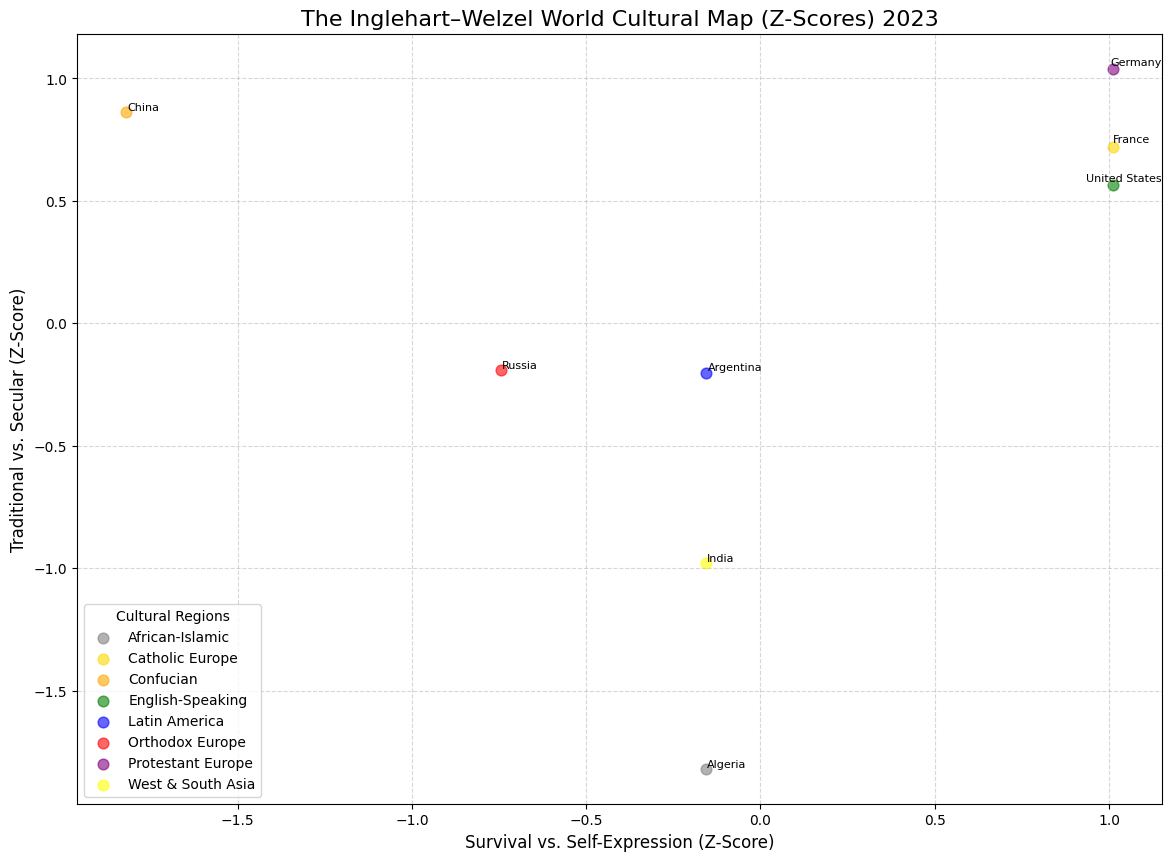

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Load the aggregated cultural indices
aggregated_indices = pd.read_csv("final_transformed_cultural_indices_by_country.csv")

# Add cultural regions mapping (replace this with your actual mapping if available)
cultural_regions = {
    'Algeria': 'African-Islamic',
    'China': 'Confucian',
    'Argentina': 'Latin America',
    'France': 'Catholic Europe',
    'United States': 'English-Speaking',
    'Russia': 'Orthodox Europe',
    'Germany': 'Protestant Europe',
    'India': 'West & South Asia'
}

# Map countries to regions
aggregated_indices['Cultural_Region'] = aggregated_indices['Country/Territory'].map(cultural_regions)

# Ensure the column names match the dataset
print("Columns in the dataset:", aggregated_indices.columns)

# Define colors for cultural regions
colors = {
    'African-Islamic': 'gray', 'Confucian': 'orange', 'Latin America': 'blue',
    'Catholic Europe': 'gold', 'English-Speaking': 'green', 'Orthodox Europe': 'red',
    'Protestant Europe': 'purple', 'West & South Asia': 'yellow'
}

# Plot the Inglehart–Welzel World Cultural Map (Z-Scores)
plt.figure(figsize=(14, 10))

texts = []
for region, group in aggregated_indices.groupby('Cultural_Region'):
    plt.scatter(group['Survival_vs_Self_Expression_Transformed'], group['Traditional_vs_Secular_Transformed'],
                label=region, alpha=0.6, s=60, c=colors.get(region, 'black'))  # Default to black if region color not defined

    # Add country labels
    for i, row in group.iterrows():
        texts.append(
            plt.text(
                row['Survival_vs_Self_Expression_Transformed'], row['Traditional_vs_Secular_Transformed'],
                row['Country/Territory'], fontsize=8
            )
        )

# Adjust text to avoid overlaps
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Add legend and labels
plt.legend(title='Cultural Regions', loc='best', fontsize=10)
plt.title("The Inglehart–Welzel World Cultural Map (Z-Scores) 2023", fontsize=16)
plt.xlabel("Survival vs. Self-Expression (Z-Score)", fontsize=12)
plt.ylabel("Traditional vs. Secular (Z-Score)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


# Part III The Comparative Studies

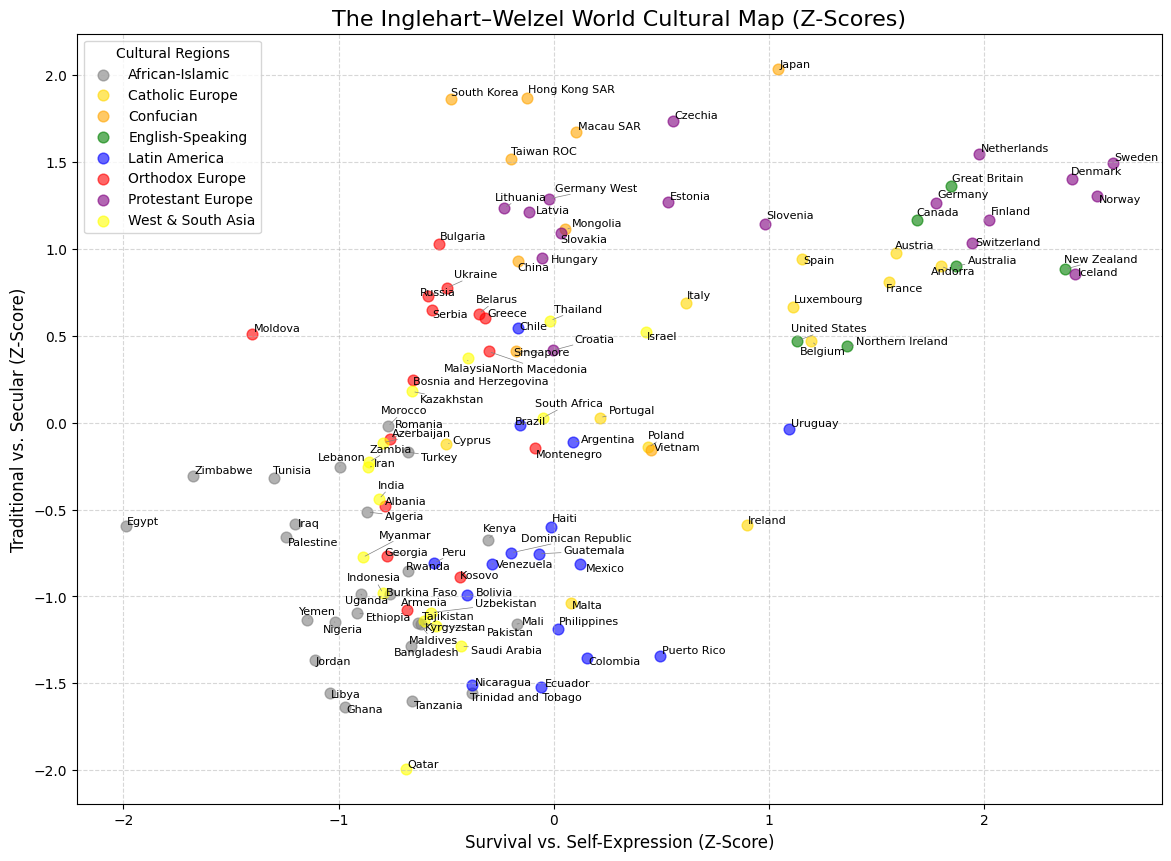

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Step 1: Load the data
file_path = 'indices.csv'  # Update with your actual file path if needed
data = pd.read_csv(file_path)

# Step 2: Calculate z-scores for the indices
data['Traditional_vs_Secular_Z'] = (data['Traditional_vs_Secular'] - data['Traditional_vs_Secular'].mean()) / data['Traditional_vs_Secular'].std()
data['Survival_vs_SelfExpression_Z'] = (data['Survival_vs_SelfExpression'] - data['Survival_vs_SelfExpression'].mean()) / data['Survival_vs_SelfExpression'].std()

data.to_csv("indicesZ.csv")
# Step 3: Define colors for cultural regions
colors = {
    'African-Islamic': 'gray', 'Confucian': 'orange', 'Latin America': 'blue',
    'Catholic Europe': 'gold', 'English-Speaking': 'green', 'Orthodox Europe': 'red',
    'Protestant Europe': 'purple', 'West & South Asia': 'yellow'
}

# Step 4: Plot the Inglehart–Welzel World Cultural Map
plt.figure(figsize=(14, 10))
texts = []

for region, group in data.groupby('Cultural_Region'):
    plt.scatter(group['Survival_vs_SelfExpression_Z'], group['Traditional_vs_Secular_Z'],
                label=region, alpha=0.6, s=60, c=colors.get(region, 'black'))  # Default to black if region color not defined

    # Add country labels
    for i, row in group.iterrows():
        texts.append(
            plt.text(
                row['Survival_vs_SelfExpression_Z'], row['Traditional_vs_Secular_Z'],
                row['Country'], fontsize=8
            )
        )

# Adjust text to avoid overlaps
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Add legend and labels
plt.legend(title='Cultural Regions', loc='best', fontsize=10)
plt.title("The Inglehart–Welzel World Cultural Map (Z-Scores)", fontsize=16)
plt.xlabel("Survival vs. Self-Expression (Z-Score)", fontsize=12)
plt.ylabel("Traditional vs. Secular (Z-Score)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


In [137]:
import pandas as pd
import plotly.graph_objects as go

# Define the cultural regions and their countries
cultural_regions = {
    'Algeria': 'African-Islamic',
    'China': 'Confucian',
    'Argentina': 'Latin America',
    'France': 'Catholic Europe',
    'United States': 'English-Speaking',
    'Russia': 'Orthodox Europe',
    'Germany': 'Protestant Europe',
    'India': 'West & South Asia'
}

# Load datasets
survey_data = pd.read_csv("indicesZ.csv")
chatgpt_data = pd.read_csv("final_transformed_cultural_indices_by_country.csv")

# Map cultural regions to countries
survey_data['Cultural_Region'] = survey_data['Country'].map(cultural_regions)
chatgpt_data['Cultural_Region'] = chatgpt_data['Country/Territory'].map(cultural_regions)

# Filter data for specified countries
countries_in_common = cultural_regions.keys()
survey_filtered = survey_data[survey_data['Country'].isin(countries_in_common)]
chatgpt_filtered = chatgpt_data[chatgpt_data['Country/Territory'].isin(countries_in_common)]

# Rename columns to prevent overlap during merge
survey_filtered = survey_filtered.rename(columns={
    'Traditional_vs_Secular_Z': 'Traditional_vs_Secular_Survey',
    'Survival_vs_SelfExpression_Z': 'Survival_vs_SelfExpression_Survey'
})
chatgpt_filtered = chatgpt_filtered.rename(columns={
    'Traditional_vs_Secular_Transformed': 'Traditional_vs_Secular_ChatGPT',
    'Survival_vs_Self_Expression_Transformed': 'Survival_vs_SelfExpression_ChatGPT'
})

# Merge datasets by country
merged_data = pd.merge(
    survey_filtered[['Country', 'Traditional_vs_Secular_Survey', 'Survival_vs_SelfExpression_Survey', 'Cultural_Region']],
    chatgpt_filtered[['Country/Territory', 'Traditional_vs_Secular_ChatGPT', 'Survival_vs_SelfExpression_ChatGPT']],
    left_on="Country",
    right_on="Country/Territory"
)

# Plot both datasets
fig = go.Figure()

# Add survey data
fig.add_trace(go.Scatter(
    x=merged_data['Survival_vs_SelfExpression_Survey'],
    y=merged_data['Traditional_vs_Secular_Survey'],
    mode='markers+text',
    text=merged_data['Country'],
    name='Survey Data',
    marker=dict(size=10, color='blue'),
    textposition="top center"
))

# Add ChatGPT data
fig.add_trace(go.Scatter(
    x=merged_data['Survival_vs_SelfExpression_ChatGPT'],
    y=merged_data['Traditional_vs_Secular_ChatGPT'],
    mode='markers+text',
    text=merged_data['Country'],
    name='ChatGPT Data',
    marker=dict(size=10, color='orange'),
    textposition="top center"
))

# Layout customization
fig.update_layout(
    title="Cultural Indices Comparison (Survey vs ChatGPT)",
    xaxis_title="Survival vs. Self-Expression",
    yaxis_title="Traditional vs. Secular",
    legend_title="Dataset",
    template="plotly",
    updatemenus=[
        dict(
            buttons=[
                dict(label="Survey Data", method="update", args=[{"visible": [True, False]}, {"title": "Survey Data"}]),
                dict(label="ChatGPT Data", method="update", args=[{"visible": [False, True]}, {"title": "ChatGPT Data"}]),
                dict(label="Both", method="update", args=[{"visible": [True, True]}, {"title": "Both Datasets"}]),
            ],
            direction="down",
            showactive=True,
        )
    ]
)

# Show plot
fig.show()
